In [1]:
 #!pip install ipywidgets
 #!pip install -U scikit-fuzzy

In [6]:
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf
from IPython.display import display

In [7]:
# Define input variables
# Define the input variable representing data redundancy
data_redundancy_input = ctrl.Antecedent(np.arange(0, 11, 1), 'Data Redundancy')

# Define the input variable representing degradation level
degradation_level_input = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'Degradation Level')

# Define the input variable representing error history
error_history_input = ctrl.Antecedent(np.arange(0, 11, 1), 'Error History')

# Auto-membership function generation for input variables
data_redundancy_input.automf(3)  # Using 3 membership functions
degradation_level_input.automf(3)  # Using 3 membership functions
error_history_input.automf(3)  # Using 3 membership functions

# Output Variable
# Define the output variable representing error likelihood
error_likelihood_output = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Error Likelihood')

# Additional comments:
# The input variables represent different aspects of a system (data redundancy, degradation level, error history).
# The membership functions are automatically generated to facilitate fuzzy logic reasoning.

# The output variable represents the error likelihood, and its membership functions need to be defined based on
# the specific requirements of the system and the fuzzy logic inference rules.

In [8]:
# Fuzzification
# Define membership functions for the data redundancy input variable
data_redundancy_input['Low'] = mf.trimf(data_redundancy_input.universe, [0, 5, 10])
data_redundancy_input['Medium'] = mf.trimf(data_redundancy_input.universe, [2.5, 5.0, 7.5])
data_redundancy_input['High'] = mf.trimf(data_redundancy_input.universe, [5, 10, 10])

# Define membership functions for the degradation level input variable
degradation_level_input['Low'] = mf.trimf(degradation_level_input.universe, [0, 0, 2.5])
degradation_level_input['Medium'] = mf.trimf(degradation_level_input.universe, [0, 2.5, 5])
degradation_level_input['High'] = mf.trimf(degradation_level_input.universe, [2.5, 5, 5])

# Define membership functions for the error history input variable
error_history_input['Low'] = mf.trimf(error_history_input.universe, [0, 0, 5])
error_history_input['Moderate'] = mf.trimf(error_history_input.universe, [0, 5, 10])
error_history_input['High'] = mf.trimf(error_history_input.universe, [5, 10, 10])

# Define membership functions for the error likelihood output variable
error_likelihood_output['Low'] = mf.trimf(error_likelihood_output.universe, [0, 0, 0.5])
error_likelihood_output['Medium'] = mf.trimf(error_likelihood_output.universe, [0, 0.5, 1])
error_likelihood_output['High'] = mf.trimf(error_likelihood_output.universe, [0.5, 1, 1])

# Additional comments:
# Fuzzification involves defining membership functions for each linguistic term associated with input and output variables.
# The trimf function is used to create triangular membership functions with specified parameters.

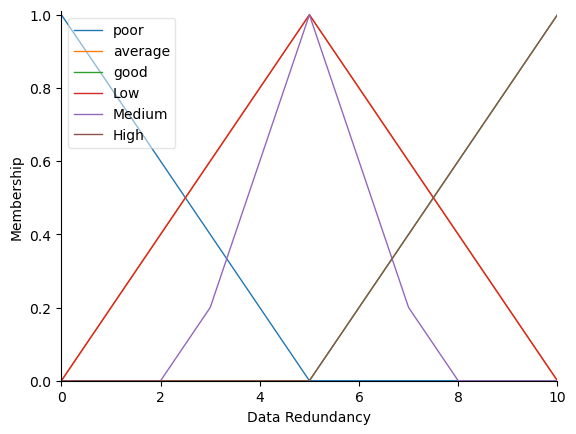

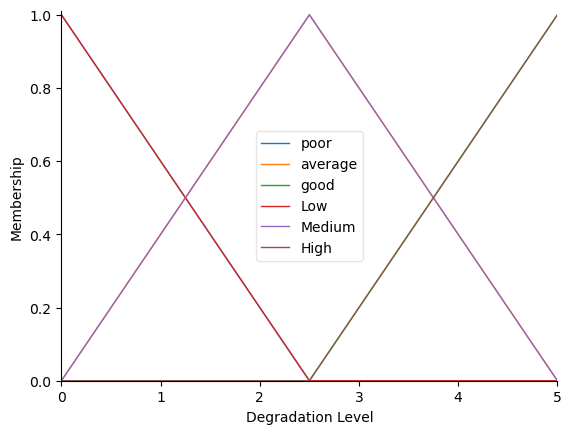

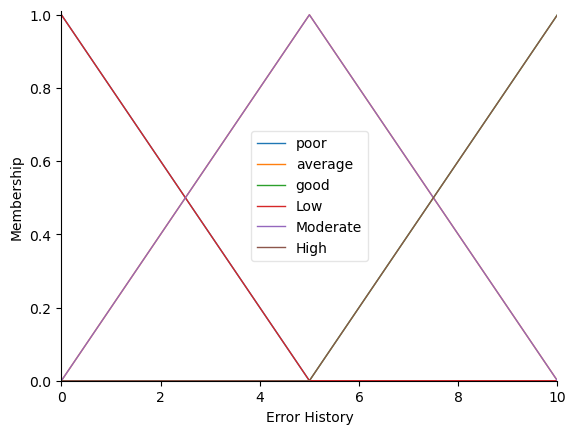

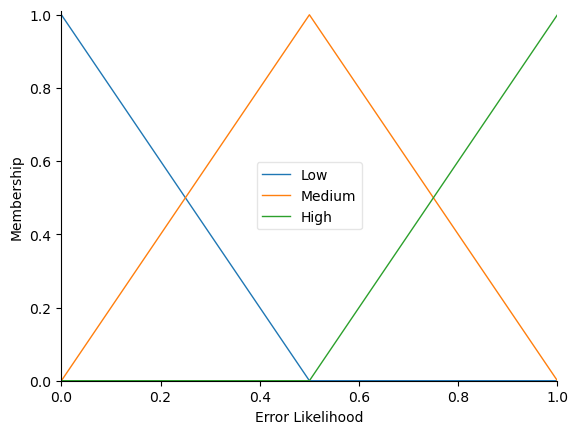

In [9]:
data_redundancy_input.view()
degradation_level_input.view()
error_history_input.view()
error_likelihood_output.view()

# Additional comments:
# The 'view()' method is used to visualize the membership functions of fuzzy variables.
# Each variable is displayed with its associated membership functions on separate plots.

In [10]:
# Define rules for the fuzzy system
rule1 = ctrl.Rule(data_redundancy_input['High'] & degradation_level_input['Low'] & error_history_input['Moderate'], error_likelihood_output['Low'])
rule2 = ctrl.Rule(data_redundancy_input['Medium'] & degradation_level_input['Medium'] & error_history_input['Moderate'], error_likelihood_output['Medium'])
rule3 = ctrl.Rule(data_redundancy_input['Low'] & degradation_level_input['High'] & error_history_input['High'], error_likelihood_output['High'])
rule4 = ctrl.Rule(data_redundancy_input['High'] & degradation_level_input['Medium'] & error_history_input['Low'], error_likelihood_output['Medium'])
rule5 = ctrl.Rule(data_redundancy_input['Low'] & degradation_level_input['Low'] & error_history_input['Moderate'], error_likelihood_output['Low'])
rule6 = ctrl.Rule(data_redundancy_input['Medium'] & degradation_level_input['High'] & error_history_input['High'], error_likelihood_output['High'])
rule7 = ctrl.Rule(data_redundancy_input['High'] & degradation_level_input['Medium'] & error_history_input['High'], error_likelihood_output['High'])
rule8 = ctrl.Rule(data_redundancy_input['Medium'] & degradation_level_input['Low'] & error_history_input['Low'], error_likelihood_output['Low'])
rule9 = ctrl.Rule(data_redundancy_input['Low'] & degradation_level_input['High'] & error_history_input['Moderate'], error_likelihood_output['Medium'])

# Create the control system
error_detection_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
error_detector = ctrl.ControlSystemSimulation(error_detection_system)

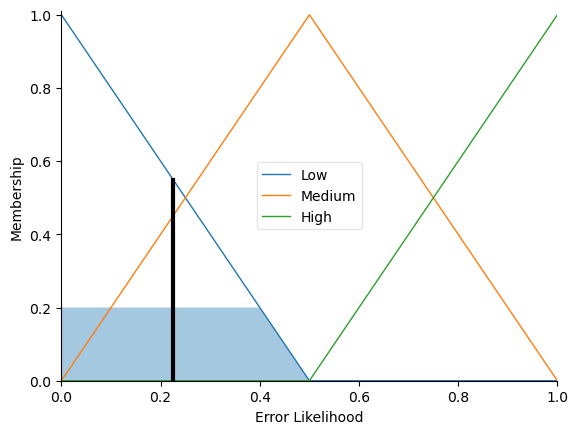

In [11]:
from matplotlib import pyplot as plt

# Set input values
error_detector.input['Data Redundancy'] = 2
error_detector.input['Degradation Level'] = 2
error_detector.input['Error History'] = 4

# Compute the fuzzy system
error_detector.compute()

# View the output
error_likelihood_output.view(sim=error_detector)
# Alternatively, you can also view the output using the following line:
# error_detector.output['Error Likelihood'].view()

In [12]:
# Run this code block again separately after executing the whole file for the first time

from IPython.core.display_functions import clear_output
from ipywidgets import widgets

# User Interface
data_redundancy_slider = widgets.FloatSlider(value=2, min=0, max=10, step=1, description='Data Redundancy')
degradation_level_slider = widgets.FloatSlider(value=2, min=0, max=5, step=0.1, description='Degradation Level')
error_history_slider = widgets.FloatSlider(value=4, min=0, max=10, step=1, description='Error History')

calculate_button = widgets.Button(description="Calculate Error")
output_text = widgets.Output()

def calculate_likelihood(b):
    error_detector.input['Data Redundancy'] = data_redundancy_slider.value
    error_detector.input['Degradation Level'] = degradation_level_slider.value
    error_detector.input['Error History'] = error_history_slider.value
    error_detector.compute()

    with output_text:
        clear_output(wait=True)
        print("Error Likelihood:", error_detector.output['Error Likelihood'])
        error_likelihood_output.view(sim=error_detector)

calculate_button.on_click(calculate_likelihood)

# Display the user interface
display(data_redundancy_slider, degradation_level_slider, error_history_slider, calculate_button, output_text)

FloatSlider(value=2.0, description='Data Redundancy', max=10.0, step=1.0)

FloatSlider(value=2.0, description='Degradation Level', max=5.0)

FloatSlider(value=4.0, description='Error History', max=10.0, step=1.0)

Button(description='Calculate Error', style=ButtonStyle())

Output()

In [13]:
from IPython.core.display_functions import clear_output
from ipywidgets import widgets

# User Interface
data_redundancy_slider = widgets.FloatSlider(value=2, min=0, max=10, step=1, description='Data Redundancy')
degradation_level_slider = widgets.FloatSlider(value=2, min=0, max=5, step=0.1, description='Degradation Level')
error_history_slider = widgets.FloatSlider(value=4, min=0, max=10, step=1, description='Error History')

calculate_button = widgets.Button(description="Calculate Error")
output_text = widgets.Output()

# Variable to store error_likelihood
stored_error_likelihood = None

def classify_error_likelihood(error_likelihood_value):
    # Classify the error likelihood into categories
    if error_likelihood_value <= 0.3:
        return "Low"
    elif 0.3 < error_likelihood_value <= 0.6:
        return "Medium"
    else:
        return "High"

def calculate_likelihood(b):
    global stored_error_likelihood  # Declare the variable as global
    error_detector.input['Data Redundancy'] = data_redundancy_slider.value
    error_detector.input['Degradation Level'] = degradation_level_slider.value
    error_detector.input['Error History'] = error_history_slider.value
    error_detector.compute()

    with output_text:
        clear_output(wait=True)
        error_likelihood_value = error_detector.output['Error Likelihood']
        print("Error Likelihood:", error_likelihood_value)

        # Classify and print the category
        error_category = classify_error_likelihood(error_likelihood_value)
        print("Error Category:", error_category)

        # Store the value in the variable
        stored_error_likelihood = error_likelihood_value

calculate_button.on_click(calculate_likelihood)

# Display the user interface
display(data_redundancy_slider, degradation_level_slider, error_history_slider, calculate_button, output_text)

FloatSlider(value=2.0, description='Data Redundancy', max=10.0, step=1.0)

FloatSlider(value=2.0, description='Degradation Level', max=5.0)

FloatSlider(value=4.0, description='Error History', max=10.0, step=1.0)

Button(description='Calculate Error', style=ButtonStyle())

Output()